In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
df = pd.read_csv(r'/Users/sehan/Documents/Data_Collection-26-08/binarytop25.csv')
df.head()

,Unnamed: 0,Seq,Mean,sTos,sTtl,dTtl,sHops,TotBytes,SrcBytes,Offset,...,e d,icmp,tcp,CON,FIN,INT,REQ,RST,Status,cs0
0,0,1,0.000000,0.0,58.0,59.0,6.0,98,98,128,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,2,0.000000,0.0,58.0,59.0,6.0,98,98,232,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,3,4.998020,0.0,117.0,64.0,11.0,249093,244212,336,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,4,4.998037,0.0,117.0,64.0,11.0,221712,216245,440,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,5,4.999453,0.0,117.0,64.0,11.0,280216,275723,544,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [2]:
df = df.fillna(df.median())
print(df)

         Unnamed: 0  Seq      Mean   sTos   sTtl   dTtl  sHops  TotBytes  \
0                 0    1  0.000000    0.0   58.0   59.0    6.0        98   
1                 1    2  0.000000    0.0   58.0   59.0    6.0        98   
2                 2    3  4.998020    0.0  117.0   64.0   11.0    249093   
3                 3    4  4.998037    0.0  117.0   64.0   11.0    221712   
4                 4    5  4.999453    0.0  117.0   64.0   11.0    280216   
...             ...  ...       ...    ...    ...    ...    ...       ...   
1215885     1215885    1  0.000000  186.0  252.0  255.0    4.0       200   
1215886     1215886    3  0.235607  186.0  255.0  250.0    1.0      3056   
1215887     1215887  764  0.099927    0.0   64.0  114.0    0.0       252   
1215888     1215888    3  1.307852  186.0  255.0  250.0    1.0       596   
1215889     1215889    1  0.476803  186.0  252.0  255.0    4.0       392   

         SrcBytes  Offset  ...   e d        icmp  tcp  CON  FIN  INT  REQ  \
0         

In [3]:
df = df.iloc[: , 1:]
display(df)

,Seq,Mean,sTos,sTtl,dTtl,sHops,TotBytes,SrcBytes,Offset,sMeanPktSz,...,e d,icmp,tcp,CON,FIN,INT,REQ,RST,Status,cs0
0,1,0.000000,0.0,58.0,59.0,6.0,98,98,128,98.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0.000000,0.0,58.0,59.0,6.0,98,98,232,98.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,4.998020,0.0,117.0,64.0,11.0,249093,244212,336,1245.979614,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,4.998037,0.0,117.0,64.0,11.0,221712,216245,440,1326.656494,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,4.999453,0.0,117.0,64.0,11.0,280216,275723,544,1351.583374,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,0.000000,186.0,252.0,255.0,4.0,200,102,190300,102.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1215886,3,0.235607,186.0,255.0,250.0,1.0,3056,290,190392,96.666664,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1215887,764,0.099927,0.0,64.0,114.0,0.0,252,160,190496,80.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1215888,3,1.307852,186.0,255.0,250.0,1.0,596,306,190704,102.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
for col in df.columns:
    print(col)

Seq
Mean
sTos
sTtl
dTtl
sHops
TotBytes
SrcBytes
Offset
sMeanPktSz
dMeanPktSz
SrcWin
TcpRtt
AckDat
Label
 e        
 e d      
icmp
tcp
CON
FIN
INT
REQ
RST
Status
cs0


In [5]:
column_to_move = df.pop("Label")

df.insert(25, "Label", column_to_move)

print(df)

         Seq      Mean   sTos   sTtl   dTtl  sHops  TotBytes  SrcBytes  \
0          1  0.000000    0.0   58.0   59.0    6.0        98        98   
1          2  0.000000    0.0   58.0   59.0    6.0        98        98   
2          3  4.998020    0.0  117.0   64.0   11.0    249093    244212   
3          4  4.998037    0.0  117.0   64.0   11.0    221712    216245   
4          5  4.999453    0.0  117.0   64.0   11.0    280216    275723   
...      ...       ...    ...    ...    ...    ...       ...       ...   
1215885    1  0.000000  186.0  252.0  255.0    4.0       200       102   
1215886    3  0.235607  186.0  255.0  250.0    1.0      3056       290   
1215887  764  0.099927    0.0   64.0  114.0    0.0       252       160   
1215888    3  1.307852  186.0  255.0  250.0    1.0       596       306   
1215889    1  0.476803  186.0  252.0  255.0    4.0       392       200   

         Offset   sMeanPktSz  ...  icmp  tcp  CON  FIN  INT  REQ  RST  Status  \
0           128    98.000000  

In [97]:
df = df.drop(columns=['Attack Type', 'Attack type based on tool'])

KeyError: "['Attack Type' 'Attack type based on tool'] not found in axis"

In [6]:
X = df.iloc[:,0:24].values
y = df.iloc[:,25].values

In [7]:
#test and train split (30% for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [8]:
#data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
import time
from sklearn import tree 
model = tree.DecisionTreeClassifier()
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 11.545459032058716s


In [12]:
from sklearn.metrics import roc_auc_score
start = time.time()
y_pred = model.predict(X_test)
stop = time.time()
y_pred
print(f"Prediction time: {stop - start}s")

Prediction time: 0.11648392677307129s


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print(accuracy_score(y_test, y_pred))

[[142703    648]
 [   267 221149]]
              precision    recall  f1-score   support

      Benign     0.9981    0.9955    0.9968    143351
   Malicious     0.9971    0.9988    0.9979    221416

    accuracy                         0.9975    364767
   macro avg     0.9976    0.9971    0.9974    364767
weighted avg     0.9975    0.9975    0.9975    364767

0.9974915494000279


In [14]:
print(model.tree_.max_depth)

80


In [15]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

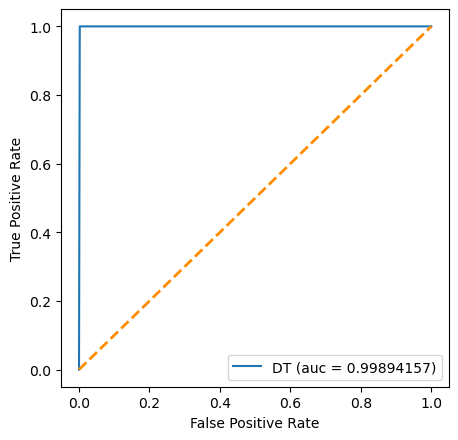

In [38]:
from sklearn.metrics import roc_curve, auc

model_fpr, model_tpr, threshold = roc_curve(y_test, y_pred[:,1])
auc_model = auc(model_fpr, model_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(model_fpr, model_tpr, linestyle='-', label='DT (auc = %0.8f)' % auc_model)
plt.plot([0, 1], [0, 1], color="darkorange", lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()
